In [4]:
!pip install tabulate seaborn

^C
ERROR: Operation cancelled by user



Dataset Analysis Report

1. Dataset Statistics
--------------------
+------------+-------------------+-----------------------+-------------------------+
| Category   |   Before Cleaning |   After Auto Cleaning |   After Manual Cleaning |
+============+===================+=======================+=========================+
| Close_Eye  |             14569 |                  9122 |                    7183 |
+------------+-------------------+-----------------------+-------------------------+
| No_Yawn    |             10816 |                  8241 |                    8174 |
+------------+-------------------+-----------------------+-------------------------+
| Open_Eye   |             10474 |                  7038 |                    6546 |
+------------+-------------------+-----------------------+-------------------------+
| Yawn       |             10195 |                  7443 |                    6091 |
+------------+-------------------+-----------------------+-----------------------

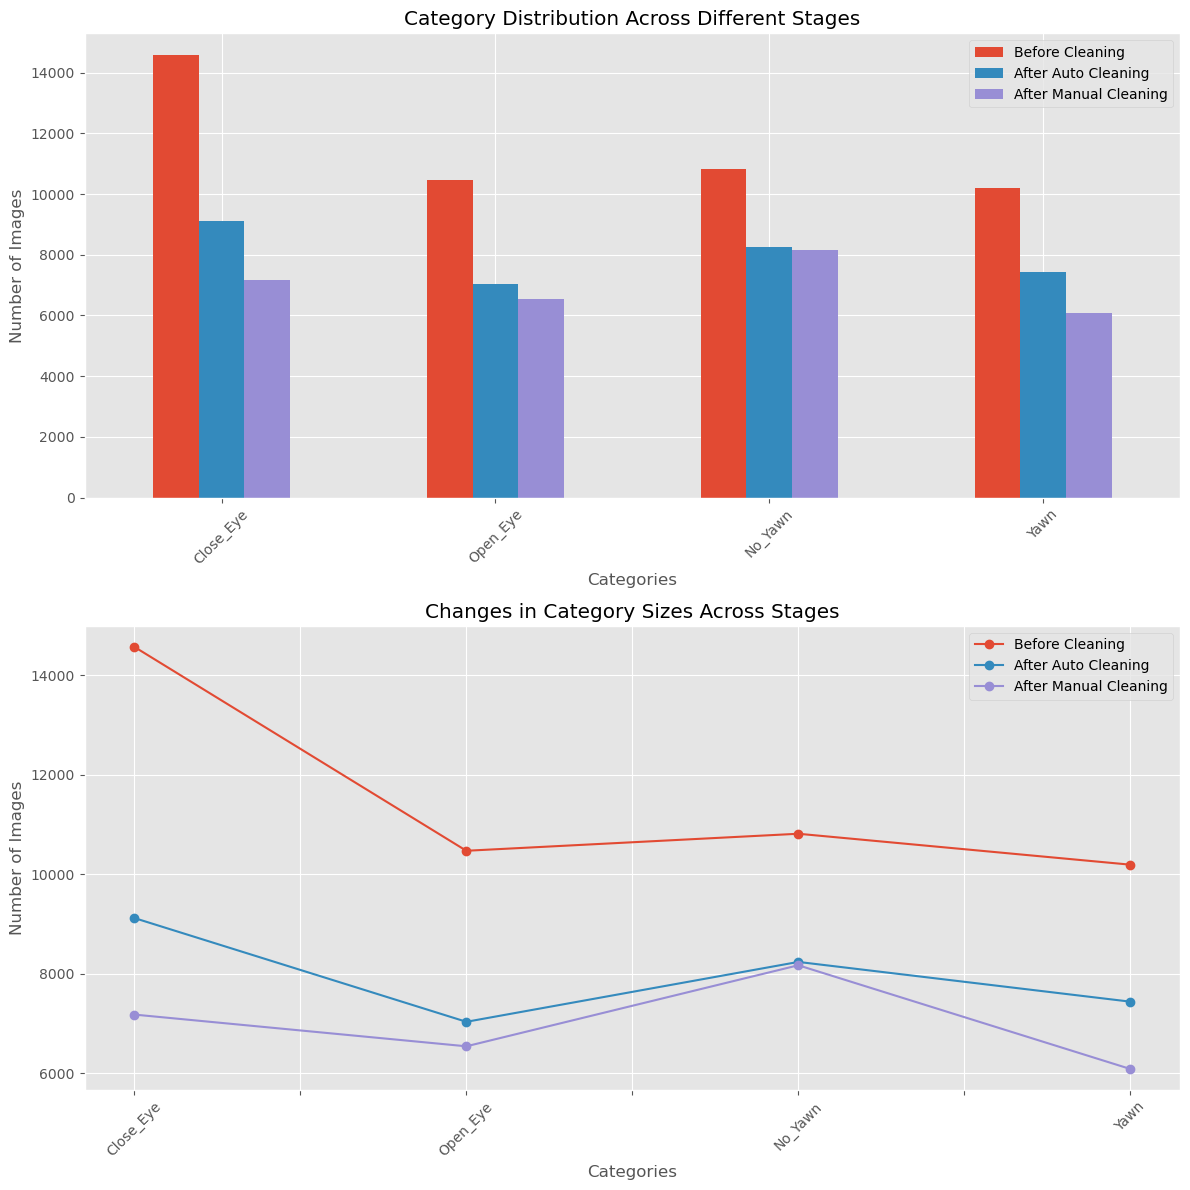

In [2]:
import os
from pathlib import Path
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

def count_images_in_dir(directory):
    """Count all image files in a directory"""
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif')
    return sum(1 for file in Path(directory).rglob('*') 
              if file.suffix.lower() in image_extensions)

def analyze_dataset(base_path):
    """Analyze the dataset and return statistics"""
    datasets = {
        'Before Cleaning': '/Users/ahmedalkhulayfi/Desktop/Real-Time-Driver-Drowsiness-Detection/datasets/raw/Dataset_Before_Cleaning',
        'After Auto Cleaning': '/Users/ahmedalkhulayfi/Desktop/Real-Time-Driver-Drowsiness-Detection/datasets/raw/Dataset_After_Auto_Cleaning',
        'After Manual Cleaning': '/Users/ahmedalkhulayfi/Desktop/Real-Time-Driver-Drowsiness-Detection/datasets/processed/Dataset_After_Manual_Cleaning'
    }
    
    stats = {}
    for stage, path in datasets.items():
        full_path = os.path.join(base_path, path)
        if not os.path.exists(full_path):
            continue
            
        categories = {}
        total = 0
        for category in os.listdir(full_path):
            category_path = os.path.join(full_path, category)
            if os.path.isdir(category_path):
                count = count_images_in_dir(category_path)
                categories[category] = count
                total += count
                
        stats[stage] = {
            'categories': categories,
            'total': total
        }
    
    return stats

def create_report(stats):
    """Create a detailed report from the statistics"""
    # Create comparison table
    table_data = []
    categories = set()
    for stage_data in stats.values():
        categories.update(stage_data['categories'].keys())
    
    categories = sorted(list(categories))
    
    # Add category rows
    for category in categories:
        row = [category]
        for stage in stats.keys():
            count = stats[stage]['categories'].get(category, 0)
            row.append(count)
        table_data.append(row)
    
    # Add total row
    total_row = ['Total']
    for stage in stats.keys():
        total_row.append(stats[stage]['total'])
    table_data.append(total_row)
    
    # Create table
    headers = ['Category'] + list(stats.keys())
    table = tabulate(table_data, headers=headers, tablefmt='grid')
    
    # Calculate percentage changes
    stages = list(stats.keys())
    changes = []
    for i in range(len(stages)-1):
        stage1, stage2 = stages[i], stages[i+1]
        change = ((stats[stage2]['total'] - stats[stage1]['total']) / 
                 stats[stage1]['total'] * 100)
        changes.append(f"{change:.1f}%")
    
    # Generate report
    report = f"""
Dataset Analysis Report
======================

1. Dataset Statistics
--------------------
{table}

2. Changes Between Stages
------------------------"""
    
    for i in range(len(changes)):
        report += f"\n{stages[i]} → {stages[i+1]}: {changes[i]} change"
    
    return report

def plot_statistics(stats):
    """Create visualizations of the dataset statistics"""
    # Prepare data for plotting
    df = pd.DataFrame({stage: data['categories'] 
                      for stage, data in stats.items()}).fillna(0)
    
    # Set up the plotting style
    plt.style.use('ggplot')  # Using ggplot style instead of seaborn
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Bar plot
    df.plot(kind='bar', ax=ax1)
    ax1.set_title('Category Distribution Across Different Stages')
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Number of Images')
    ax1.tick_params(axis='x', rotation=45)
    
    # Line plot
    df.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Changes in Category Sizes Across Stages')
    ax2.set_xlabel('Categories')
    ax2.set_ylabel('Number of Images')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    return fig

def main():
    # Set the base path to your dataset directory
    base_path = 'datasets'  # Adjust this path as needed
    
    # Analyze the dataset
    stats = analyze_dataset(base_path)
    
    # Generate and print the report
    report = create_report(stats)
    print(report)
    
    # Create and save visualizations
    fig = plot_statistics(stats)
    plt.savefig('dataset_statistics.png')
    
    # Save report to file
    with open('dataset_report.txt', 'w') as f:
        f.write(report)

if __name__ == "__main__":
    main()

In [3]:
from models.train import training
import torch

x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x + 0.1 * torch.randn(x.size())
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=10, shuffle=True)

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

training( model,
   train_loader,
    test_loader,
    optimizer,
   "cpu",
   criterion,
   100,
   'best_model_test.pth',
    scheduler = None)

KeyboardInterrupt: 

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("/Users/ahmedalkhulayfi/Desktop/Real-Time-Driver-Drowsiness-Detection/src/models/eye_state_model.pth")  # build a new model from YAML

# Train the model
results = model.train(data="mnist160", epochs=100, imgsz=64)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


TypeError: model='/Users/ahmedalkhulayfi/Desktop/Real-Time-Driver-Drowsiness-Detection/src/models/eye_state_model.pth' should be a *.pt PyTorch model to run this method, but is a different format. PyTorch models can train, val, predict and export, i.e. 'model.train(data=...)', but exported formats like ONNX, TensorRT etc. only support 'predict' and 'val' modes, i.e. 'yolo predict model=yolov8n.onnx'.
To run CUDA or MPS inference please pass the device argument directly in your inference command, i.e. 'model.predict(source=..., device=0)'

In [5]:
import os
import shutil

source_dir = "/Users/ahmedalkhulayfi/Downloads/MRL Eye Dataset/open_eye"
destination_dir = "/Users/ahmedalkhulayfi/Downloads/MRL Eye Dataset/closed_eye2"

files = os.listdir(source_dir)[:50]  # Get the first 50 files
for file in files:
    shutil.move(os.path.join(source_dir, file), destination_dir)


In [5]:
import os
import shutil
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from collections import Counter

def organize_dataset(source_path, dest_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    # Create directory structure
    for split in ['train', 'test', 'val']:
        for class_name in ['Close_Eye', 'Open_Eye']:
            os.makedirs(os.path.join(dest_path, split, class_name), exist_ok=True)
    
    # Collect all image paths and their labels
    images = []
    labels = []
    for class_name in ['Close_Eye', 'Open_Eye']:
        class_path = os.path.join(source_path, 'Eyes_Dataset', class_name)
        class_images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        images.extend([(class_name, img) for img in class_images])
        labels.extend([class_name] * len(class_images))
    
    # Print initial class distribution
    print("Initial class distribution:")
    print(Counter(labels))
    
    # First split: train vs rest
    sss1 = StratifiedShuffleSplit(n_splits=1, test_size=1-train_ratio, random_state=42)
    indices = np.arange(len(images))
    
    for train_idx, temp_idx in sss1.split(indices, labels):
        train_indices = train_idx
        temp_indices = temp_idx
    
    # Second split: val vs test from the remaining data
    remaining_labels = [labels[i] for i in temp_indices]
    val_test_ratio = val_ratio / (val_ratio + test_ratio)
    
    sss2 = StratifiedShuffleSplit(n_splits=1, test_size=1-val_test_ratio, random_state=42)
    for val_idx, test_idx in sss2.split(temp_indices, remaining_labels):
        val_indices = temp_indices[val_idx]
        test_indices = temp_indices[test_idx]
    
    # Copy files to their respective directories
    splits = {
        'train': train_indices,
        'val': val_indices,
        'test': test_indices
    }
    
    for split_name, indices in splits.items():
        split_images = [images[i] for i in indices]
        print(f"\n{split_name.upper()} set distribution:")
        print(Counter([labels[i] for i in indices]))
        
        for class_name, image_name in split_images:
            src = os.path.join(source_path, 'Eyes_Dataset', class_name, image_name)
            new_name = f"{os.path.splitext(image_name)[0]}_{class_name.lower()}{os.path.splitext(image_name)[1]}"
            dst = os.path.join(dest_path, split_name, class_name, new_name)
            shutil.copy2(src, dst)

if __name__ == "__main__":
    source_path = "datasets/processed"
    destination_path = "datasets/eye_dataset_stratified"
    
    organize_dataset(source_path, destination_path)

Initial class distribution:
Counter({'No_Yawn': 8174, 'Yawn': 6091})

TRAIN set distribution:
Counter({'No_Yawn': 5722, 'Yawn': 4263})

VAL set distribution:
Counter({'No_Yawn': 1226, 'Yawn': 914})

TEST set distribution:
Counter({'No_Yawn': 1226, 'Yawn': 914})



Dataset Statistics:
--------------------------------------------------
Total images: 9610

Image Dimensions:
Min width: 9, Max width: 1625
Min height: 4, Max height: 1625
Most common dimensions: (640, 640)

Aspect Ratio:
Mean: 1.28
Std: 0.43

Pixel Statistics (mean ± std):
Blue: 98.94 ± 32.95
Green: 107.95 ± 33.51
Red: 127.66 ± 41.20

Class Distribution:


FileNotFoundError: [Errno 2] No such file or directory: '../datasets/processed/Eyes_Dataset/Close_Eye'

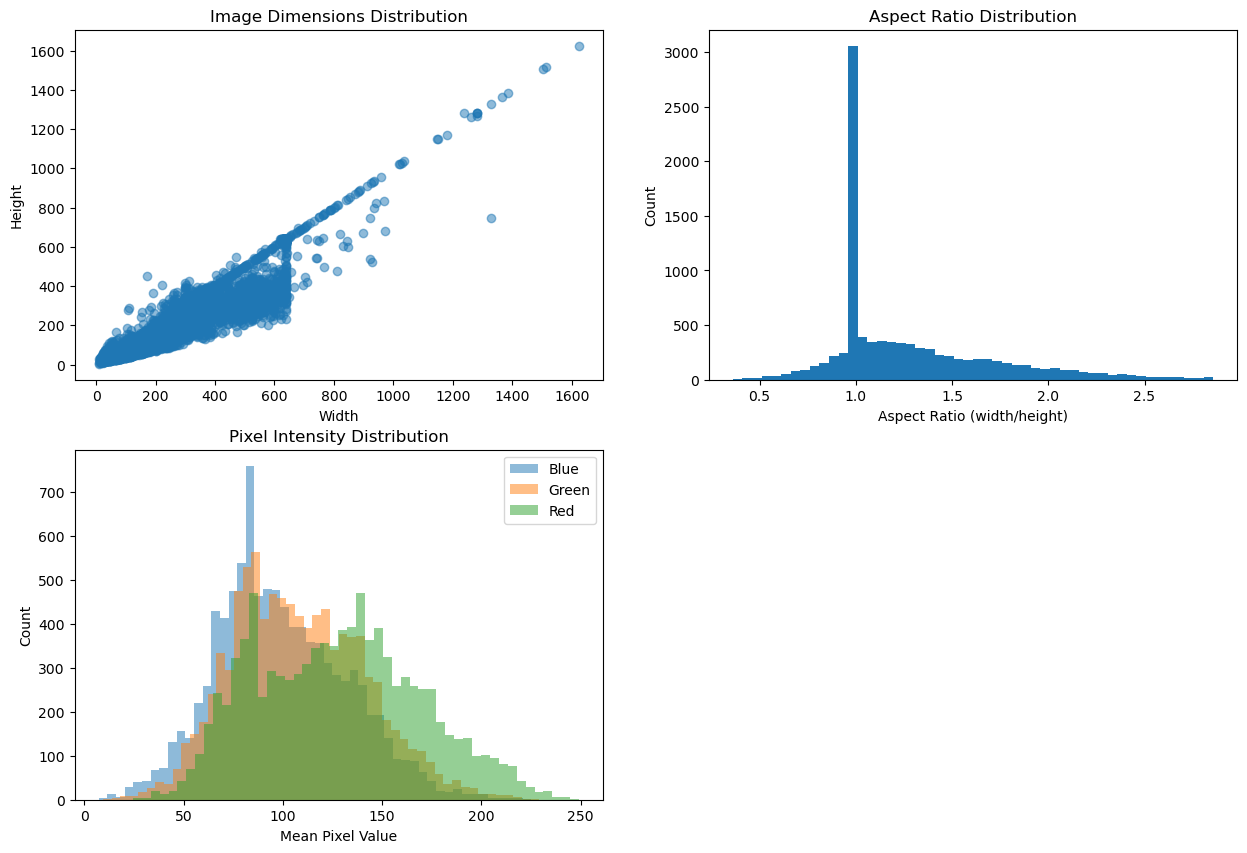

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import defaultdict

def analyze_dataset(dataset_path):
    stats = defaultdict(dict)
    image_sizes = []
    aspect_ratios = []
    pixel_means = []
    pixel_stds = []
    
    for class_name in ['Close_Eye', 'Open_Eye']:
        class_path = os.path.join(dataset_path, 'Eyes_Dataset/train', class_name)
        images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            
            # Image dimensions
            height, width = img.shape[:2]
            image_sizes.append((width, height))
            aspect_ratios.append(width / height)
            
            # Pixel statistics
            pixel_means.append(img.mean(axis=(0,1)))
            pixel_stds.append(img.std(axis=(0,1)))
            
            # Check for corrupted images
            try:
                Image.open(img_path).verify()
            except:
                print(f"Corrupted image found: {img_path}")
    
    # Plot the statistics
    plt.figure(figsize=(15, 10))
    
    # 1. Image Dimensions Distribution
    plt.subplot(2, 2, 1)
    widths, heights = zip(*image_sizes)
    plt.scatter(widths, heights, alpha=0.5)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Image Dimensions Distribution')
    
    # 2. Aspect Ratio Distribution
    plt.subplot(2, 2, 2)
    plt.hist(aspect_ratios, bins=50)
    plt.xlabel('Aspect Ratio (width/height)')
    plt.ylabel('Count')
    plt.title('Aspect Ratio Distribution')
    
    # 3. Pixel Intensity Distribution
    plt.subplot(2, 2, 3)
    pixel_means = np.array(pixel_means)
    for i, color in enumerate(['Blue', 'Green', 'Red']):
        plt.hist(pixel_means[:, i], bins=50, alpha=0.5, label=color)
    plt.xlabel('Mean Pixel Value')
    plt.ylabel('Count')
    plt.title('Pixel Intensity Distribution')
    plt.legend()
    
    # 4. Print Summary Statistics
    print("\nDataset Statistics:")
    print("-" * 50)
    print(f"Total images: {len(image_sizes)}")
    print("\nImage Dimensions:")
    print(f"Min width: {min(widths)}, Max width: {max(widths)}")
    print(f"Min height: {min(heights)}, Max height: {max(heights)}")
    print(f"Most common dimensions: {max(set(image_sizes), key=image_sizes.count)}")
    
    print("\nAspect Ratio:")
    print(f"Mean: {np.mean(aspect_ratios):.2f}")
    print(f"Std: {np.std(aspect_ratios):.2f}")
    
    print("\nPixel Statistics (mean ± std):")
    for i, color in enumerate(['Blue', 'Green', 'Red']):
        print(f"{color}: {pixel_means[:, i].mean():.2f} ± {pixel_means[:, i].std():.2f}")
    
    # Check for class balance
    print("\nClass Distribution:")
    for class_name in ['Close_Eye', 'Open_Eye']:
        class_path = os.path.join(dataset_path, 'Eyes_Dataset', class_name)
        n_images = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print(f"{class_name}: {n_images} images ({n_images/len(image_sizes)*100:.1f}%)")
    
    plt.tight_layout()
    plt.show()

    return stats

# Usage
dataset_path = "../datasets/processed/"
stats = analyze_dataset(dataset_path)